# Worksheet 10

Name:  Daniyal Ahmed
UID: U11469883

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures.

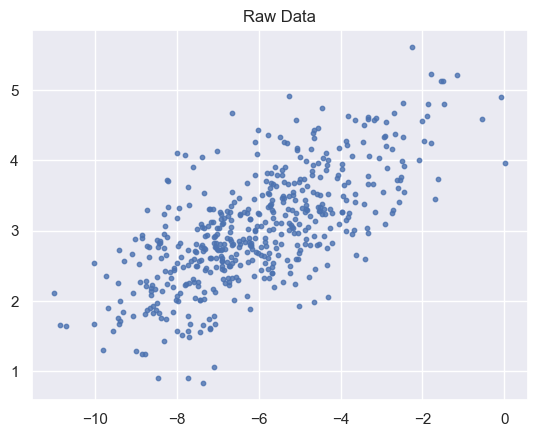

In [136]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

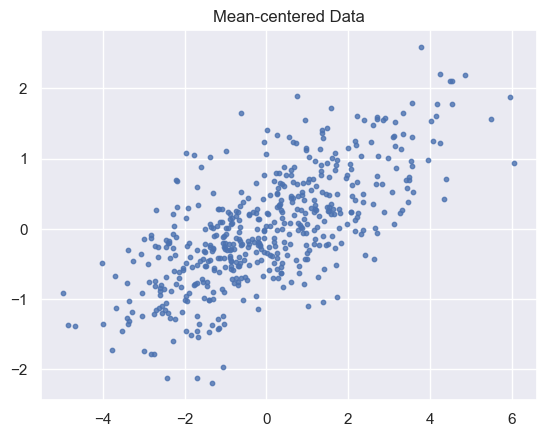

In [137]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

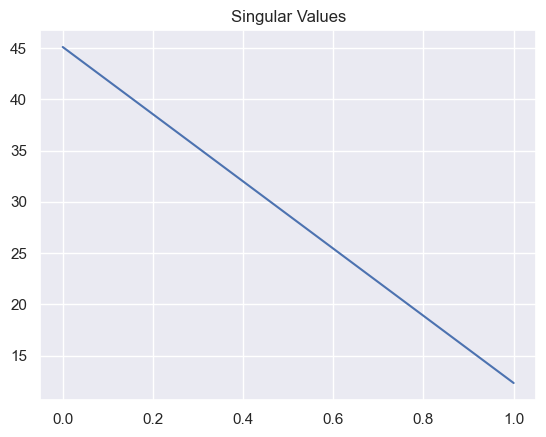

In [138]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

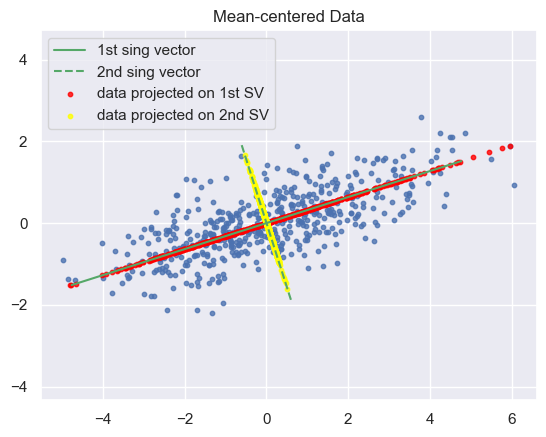

In [139]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()


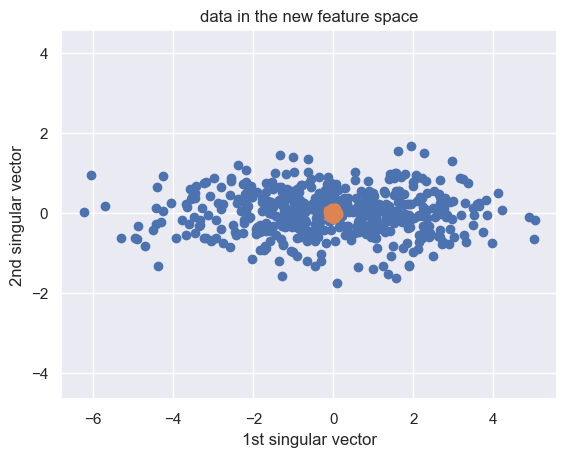

In [140]:
# show ouput from svd is the same
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

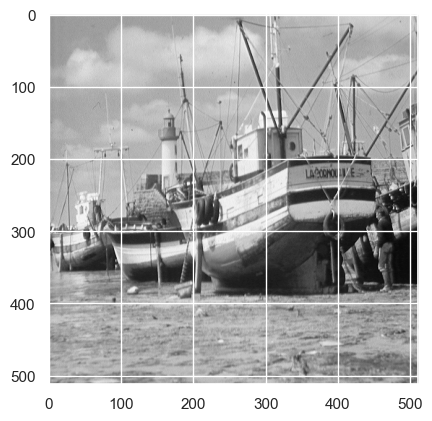

In [141]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

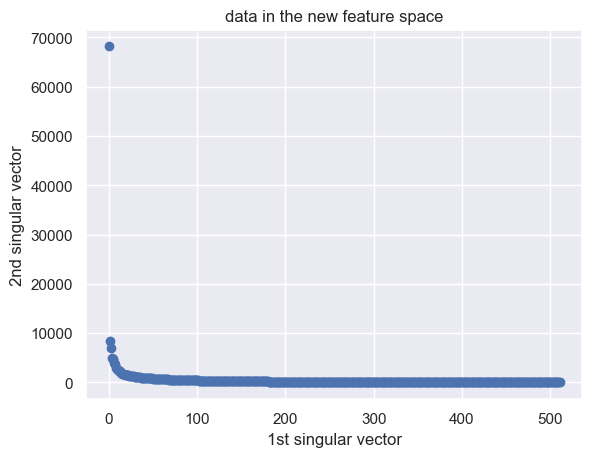

In [142]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.scatter(range(len(s)), s)
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

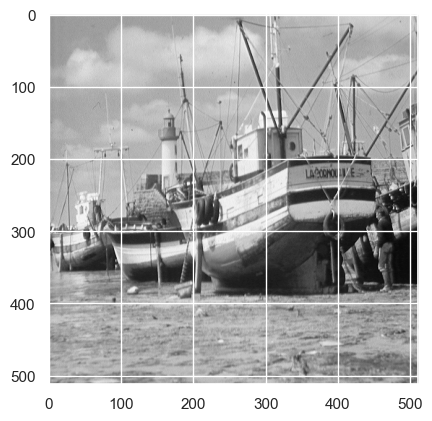

In [143]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [144]:
scopy = s.copy()
for i in range(1, len(scopy)):
    scopy[i] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

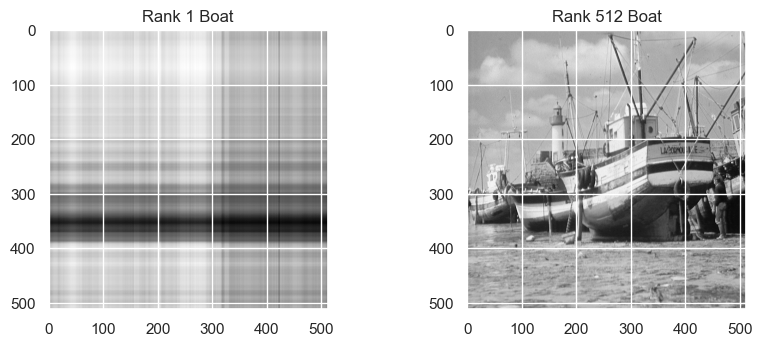

In [145]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

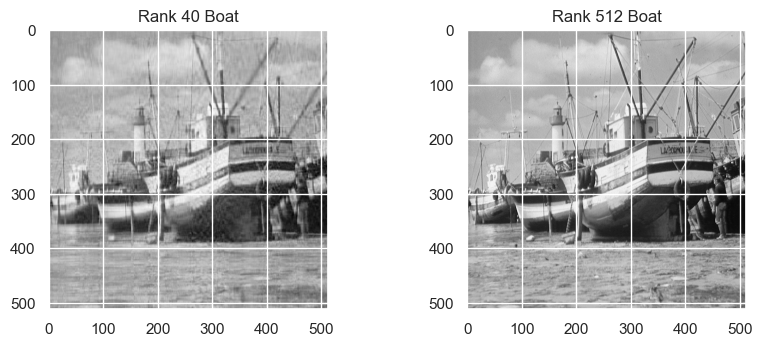

In [146]:
scopy = s.copy()
for i in range(39, len(scopy)):
    scopy[i] = 0.0


boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with classification
2. no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

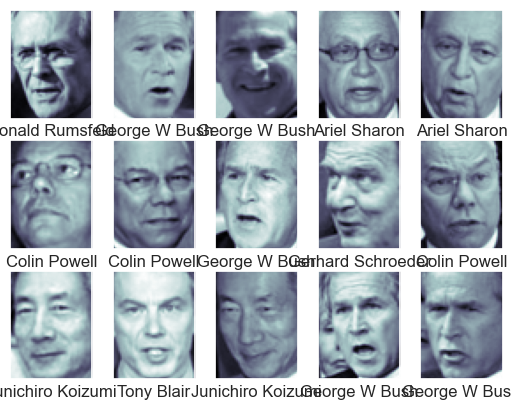

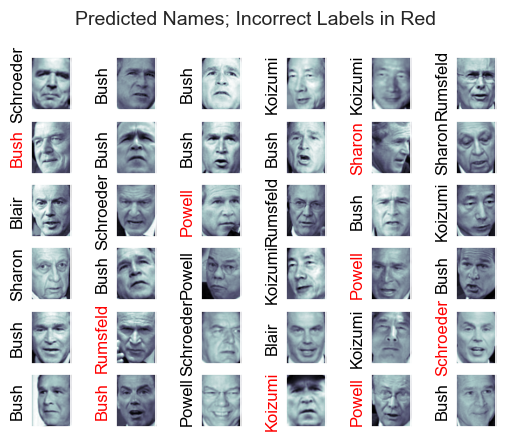

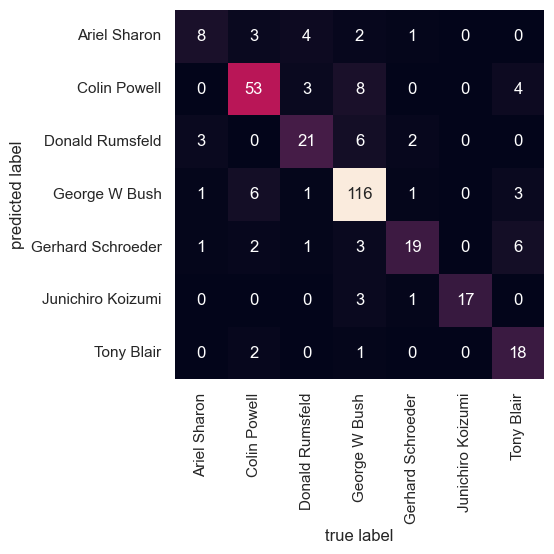

Accuracy =  0.7875


In [147]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

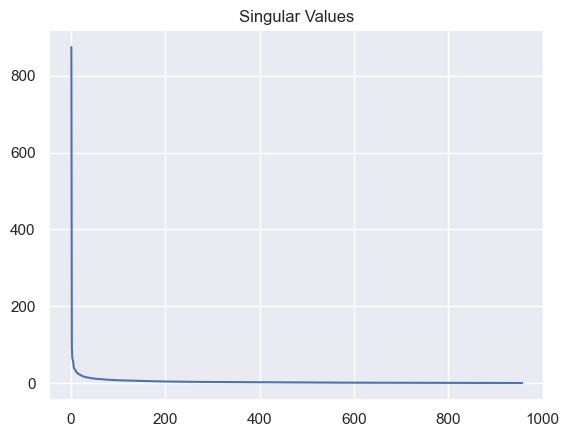

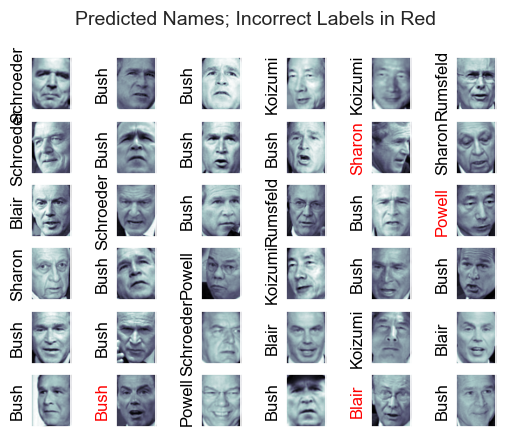

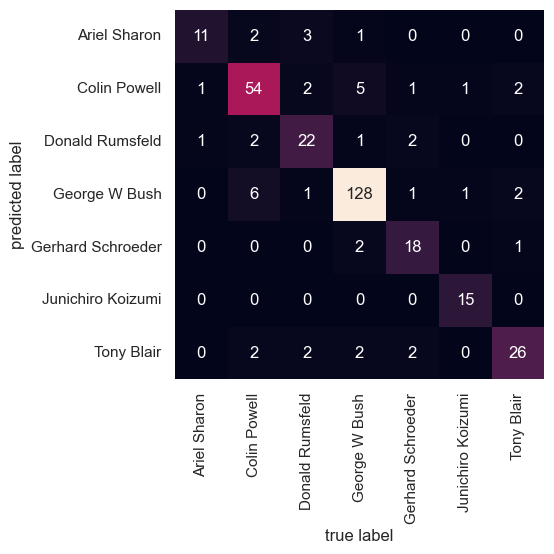

Accuracy =  0.85625


In [148]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=225, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)



fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six month period, for each of 9000 users across the 210 content categories that Facebook assigns to pages.

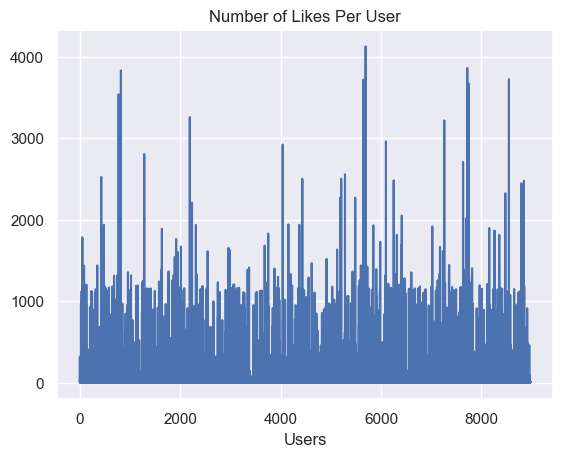

In [149]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:,1:]
FBSnorm = np.linalg.norm(FBSpatial,axis=1,ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using few singular vectors. And anomalous users can be easily identified.

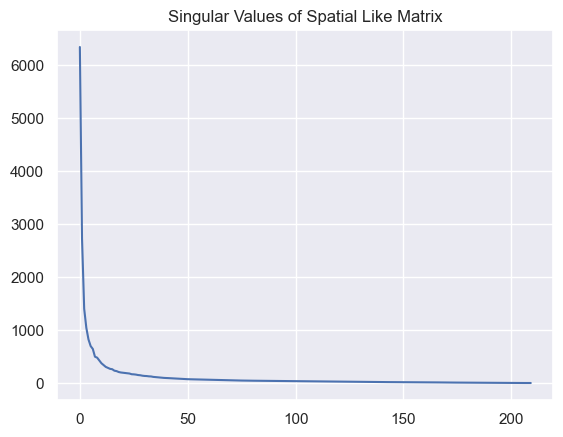

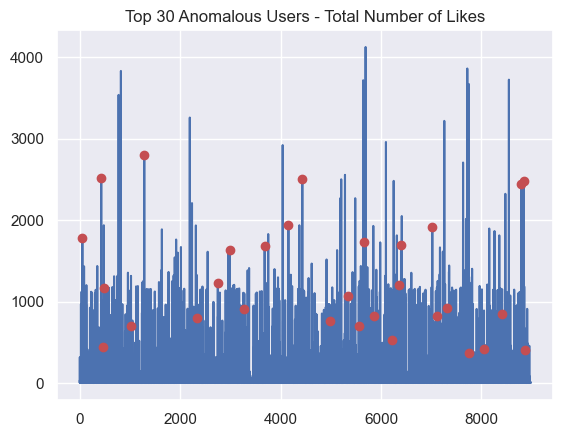

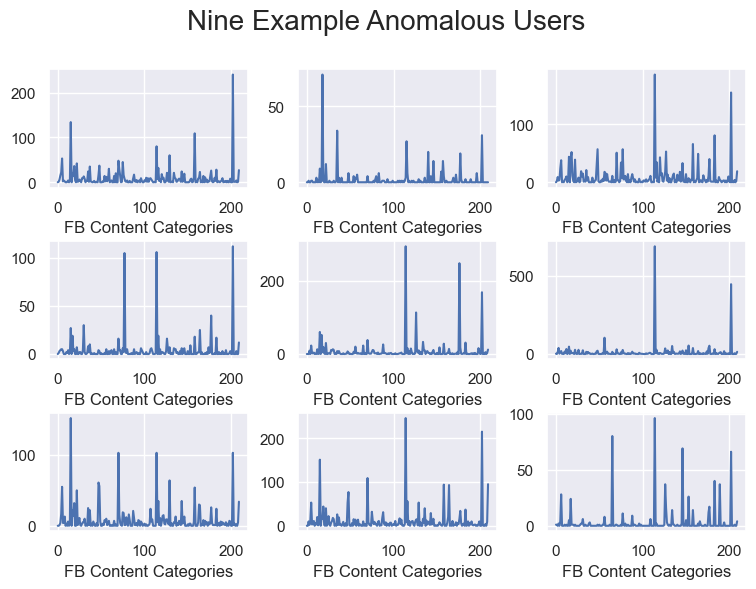

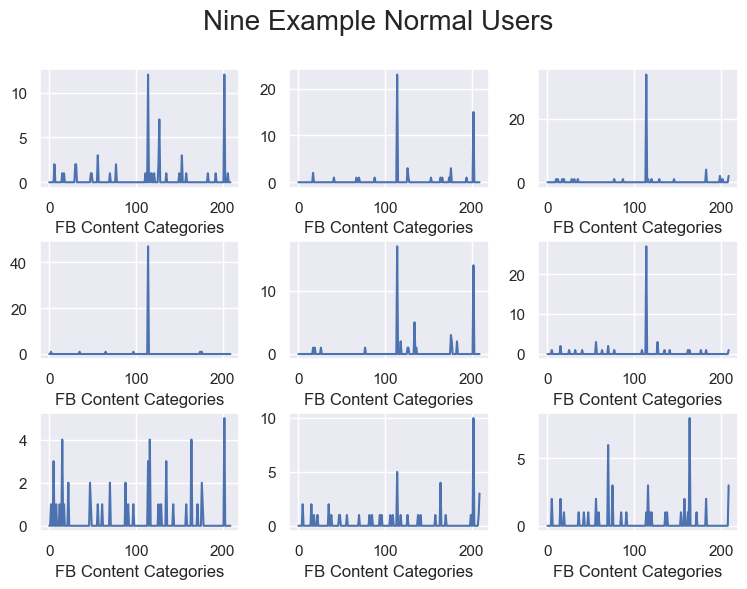

In [150]:

u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

#Bt the rank 10 approximation learned in lecture
RANK = 10
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Total Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users',size=20)
plt.show()

# normal users
set = np.argsort(Onorm)[0:7000]
# that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users',size=20)
plt.show()

## Challenge Problem

a) Fetch the "mnist_784" data. Pick an image of a digit at random and plot it.

C:\Users\eggsc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


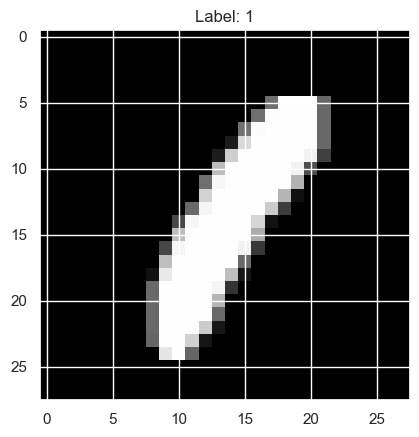

In [151]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)


#I need random
import random


random_id = random.randint(0 ,(len(X)))

#Reshaping the image so I can plot it, its given in a 1d numpy array by default
image_matrix = X[random_id].reshape(28,28)

plt.imshow(image_matrix, cmap='gray')
plt.title(f"Label: {y[random_id]}")
plt.show()



b) Plot its singular value plot.

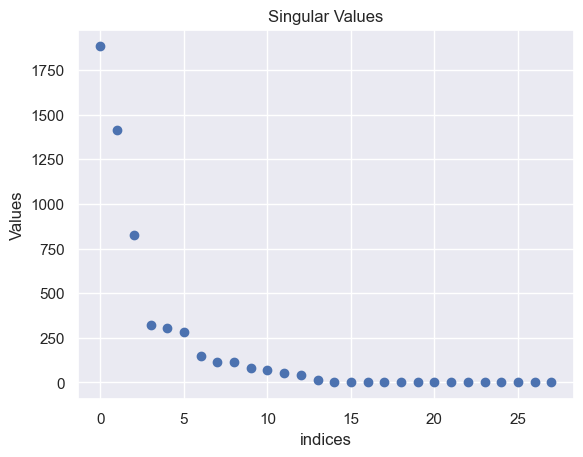

In [152]:

#Getting the singular values and ploting them
u,s,vt=np.linalg.svd(image_matrix,full_matrices=False)
plt.scatter(range(len(s)), s)
plt.xlabel("indices")
plt.ylabel("Values")
plt.title("Singular Values")
plt.show()

c) By setting some singular values to 0, plot the approximation of the image next to the original image

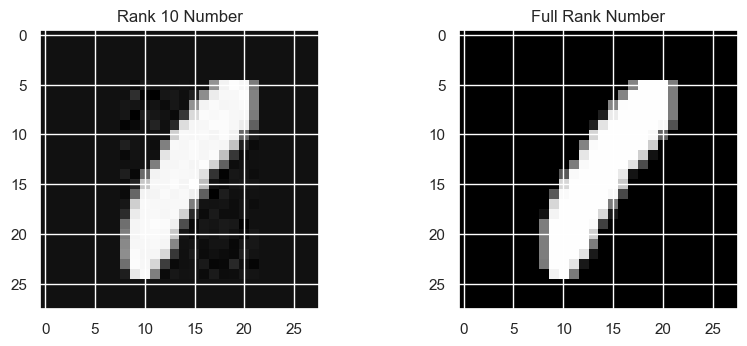

In [153]:

from matplotlib import cm

u,s,vt=np.linalg.svd(image_matrix,full_matrices=False)
scopy = s.copy()


'''You can see this as the tenth rank approximation of the original image. or Even the eblow method 
since they both are around 10 values for this image.'''
for i in range(9, len(scopy)):
    scopy[i] = 0.0


image_matrix_clone = u.dot(np.diag(scopy)).dot(vt)

#PLOTTING THE IMAGES
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(image_matrix_clone, cmap = cm.Greys_r)
plt.title('Rank 10 Number')
plt.subplot(1,2,2)
plt.imshow(image_matrix, cmap = cm.Greys_r)
plt.title('Full Rank Number')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions.

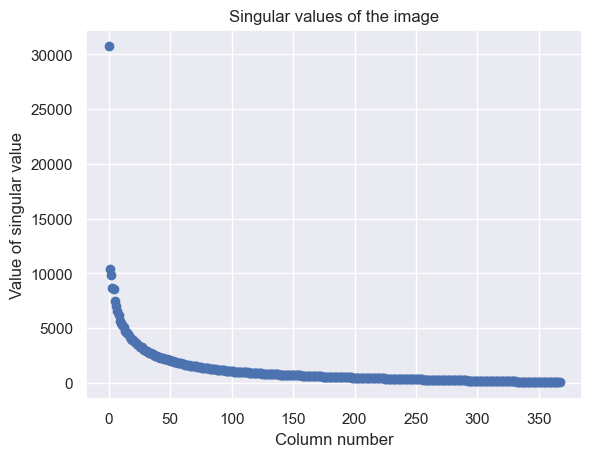

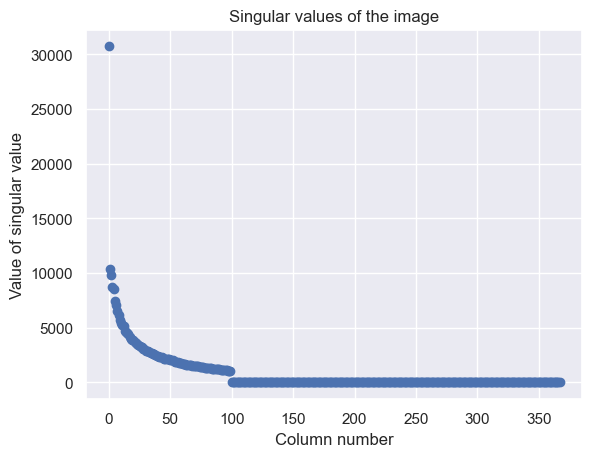

In [154]:
random_sample_size = random.randint(0,500) #This is all my poor laptop can handle :(
sample_size = np.random.choice(range(len(X)), random_sample_size, replace=False)

X_sample = X[sample_size]

u,s,vt=np.linalg.svd(X_sample,full_matrices=False)

#plotting the singular values
plt.scatter(range(len(s)), s)
plt.xlabel("Column number")
plt.ylabel("Value of singular value")
plt.title("Singular values of the image")
plt.show()


'''USING THE ELBOW METHOD'''
scopy = s.copy()
for i in range(100, len(scopy)):
    scopy[i] = 0.0

#plotting the new singular values we will have a bunch of zero points for obvious reasons
plt.scatter(range(len(s)), scopy)
plt.xlabel("Column number")
plt.ylabel("Value of singular value")
plt.title("Singular values of the image")
plt.show()

#Makeing the reduced matrix
X_sample_reduced = u.dot(np.diag(scopy)).dot(vt)



I used the elbow method that was discussed in lecture I looked the first graph and assessed that the elbow was at about 100 thus I keep the first hundred, theorectically I could have used the 10 rank approxmiation but I preferred the elbow method since it kept more information

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images.

C:\Users\eggsc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


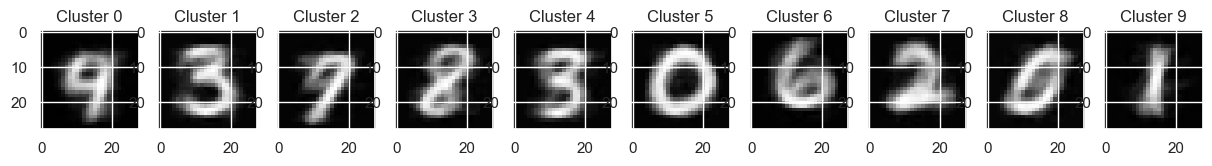

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++')


#putting our matrix into K means
kmeans.fit_predict(X_sample_reduced)


'''Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'''


#getting the centroids
centroids = kmeans.cluster_centers_

#plotting all 10 images
fig, axs = plt.subplots(1, 10, figsize=(15, 2))
for i, centroid in enumerate(centroids):
    image = centroid.reshape(28, 28)
    axs[i].imshow(image, cmap='Greys_r')
    axs[i].set_title(f'Cluster {i}')

plt.show()



f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe between the centroids created here vs the ones you created in e).

C:\Users\eggsc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


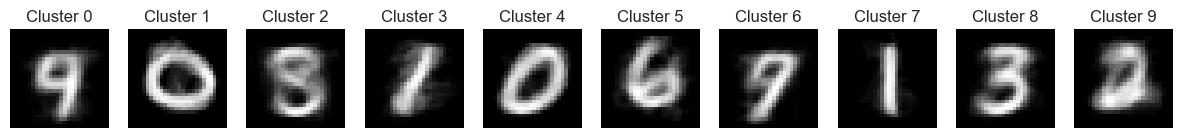

In [156]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++')
kmeans.fit_predict(X_sample)


#Catching the centrios of the clusters
centroids2 = kmeans.cluster_centers_

fig, axs = plt.subplots(1, 10, figsize=(15, 2))
#plotting all 10 images
for i, centroid in enumerate(centroids2):
    image = centroid.reshape(28, 28)
    axs[i].imshow(image, cmap='Greys_r')
    axs[i].set_title(f'Cluster {i}')
    axs[i].axis('off')

plt.show()


I believe that the numbers the appeared in the reduced sample clusters are also the same numbers that appeared in the not reduced sample. The only difference really is the exact images maybe some of the numbers of might be different one or two but for the most part they are the similar number sets but the ordering of the two is obviously different. 

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset. i.e. if the original dataset is `A` and the rank-10 approximation is `B`, then `O = A - B`

In [157]:
#GETTING the SVD
u, s, vt = np.linalg.svd(X_sample, full_matrices=False)

#copying the singular values
scopy = s.copy()

'''Only get the first ten singular values'''
for i in range(10, len(scopy)):
    scopy[i] = 0.0

X_sample_B = u.dot(np.diag(scopy)).dot(vt)

O = X_sample - X_sample_B

h) The largest (using euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images (by finding them in the original dataset) responsible for the 10 largest rows of that matrix `O`.

<function matplotlib.pyplot.show(close=None, block=None)>

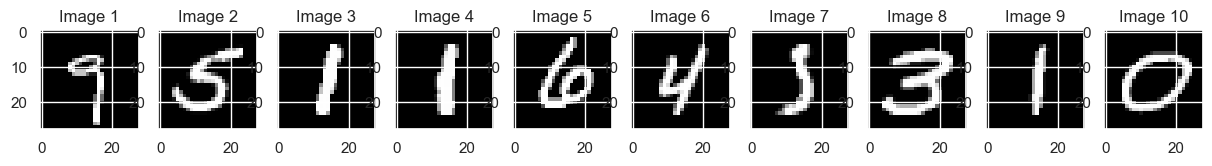

In [158]:


#Getting all the distances from the origin
alldist = np.linalg.norm(O, axis=1)


#Getting the last 10 images
lastten = np.argsort(alldist)[-10:]



#Making the subplots
fig, axs = plt.subplots(1, 10, figsize=(15, 2))

#Plotting the last ten images
for j, i in enumerate(lastten):
    axs[j].imshow(X[i].reshape(28, 28), cmap='Greys_r')  
    axs[j].set_title(f'Image {j+1}')  

plt.show



Rank ten approximations are used since they are able to capture the most important features of the data when we subtract them from the oringal matrix we are able to spot what information was lost
however out of these the farthest points from origins are least important to the data , thus they are in that sense anamoulous and they would never shouw up in the rank ten approximation